## Reading joint angles

In [200]:
import numpy as np
from matplotlib import pyplot as plt 
from math import sin,cos,pi,atan2, acos

In [176]:
f = open('leg.txt', 'r')
file = f.read()
f.close

<function TextIOWrapper.close()>

In [177]:
file.replace('   ', '  ')
lines = file.split('\n')
lines=lines[:-1]

In [178]:
for i in range(len(lines)):
    lines[i]=lines[i].split('  ')

In [179]:
for i in range(len(lines)):
    for j in range(len(lines[i])):
            lines[i][j]=float(lines[i][j])

In [180]:
lines = np.array(lines)
time = range(len(lines[:,0]))

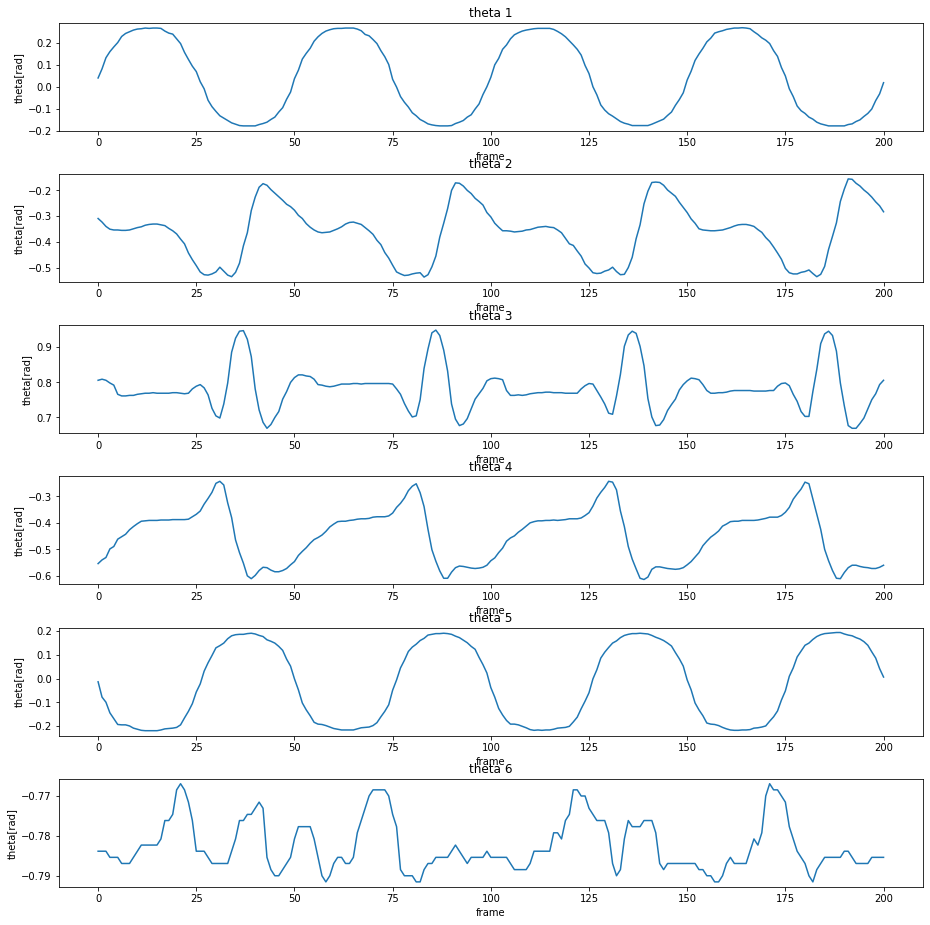

In [214]:
plt.figure(figsize=(15,15))
for i in range(6):
    ax =plt.subplot(6,1,i+1)
    plt.plot(time, lines[:,i])
    ax.set_title('theta {}'.format(i+1))
    plt.xlabel('frame')
    plt.ylabel('theta[rad]')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    

## Forward Kinematics

In [182]:
theta = lines 

In [183]:
def T_i(alpha, theta, a, d):
    return np.array([[cos(theta),                         -sin(theta),          0,             a       ],
                    [sin(theta)*cos(alpha),     cos(theta)*cos(alpha),     -sin(alpha),  -sin(alpha)*d ],
                    [sin(theta)*sin(alpha),     cos(theta)*sin(alpha),      cos(alpha),   cos(alpha)*d ],
                    [0,                            0,                         0,               1       ]])

In [184]:
alpha = [0, pi/2 , 0, 0, -pi/2, pi/2]
a = [0, 0, 102.9, 100, 0, 0]
d = [0,0,0,0,0,0]


def T(thetas):
    thetas[5]=thetas[5]-pi/4
    T = np.eye(4)
    for i in range(5,-1,-1):
        T = np.matmul(T_i(alpha[i], thetas[i], a[i], d[i]), T)
    return T

In [185]:
pos = []

for i in range(len(theta[:,0])):
    xyz = T(theta[i,:])[0:3, 3]
    pos.append(xyz)
    
pos = np.array(pos)

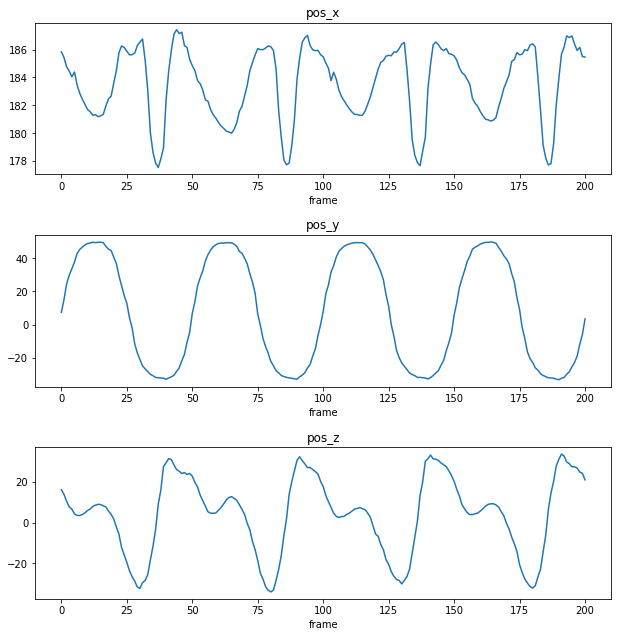

In [186]:
plt.figure(figsize=(10,10))

titles = ['pos_x', 'pos_y', 'pos_z']

for i in range(3):
    ax =plt.subplot(3,1,i+1)
    plt.plot(time, pos[:,i])
    ax.set_title(titles[i])
    plt.xlabel('frame')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [198]:
np.savetxt("data3.csv", pos, 
              delimiter = ",")

## Inverse Kinematics

In [218]:
a

[0, 0, 102.9, 100, 0, 0]

In [209]:
def IKP (x,y,z):
    theta1 = atan2(y,x)
    r = x**2 + y**2 + z**2
    theta3 = acos((r-a[3]**2-a[2]**2)/(2*a[3]*a[2]))
    theta2 = atan2(a[3]*cos(theta3)+a[2], a[3]*sin(theta3)) - atan2((x**2+y**2)**0.5, z)
    return [theta1,theta2,  theta3]

In [210]:
theta_ikp = []

for i in range(len(theta[:,0])):
    theta_ikp.append(IKP(pos[i,0], pos[i,1], pos[i,2]))
    
theta_ikp = np.array(theta_ikp)



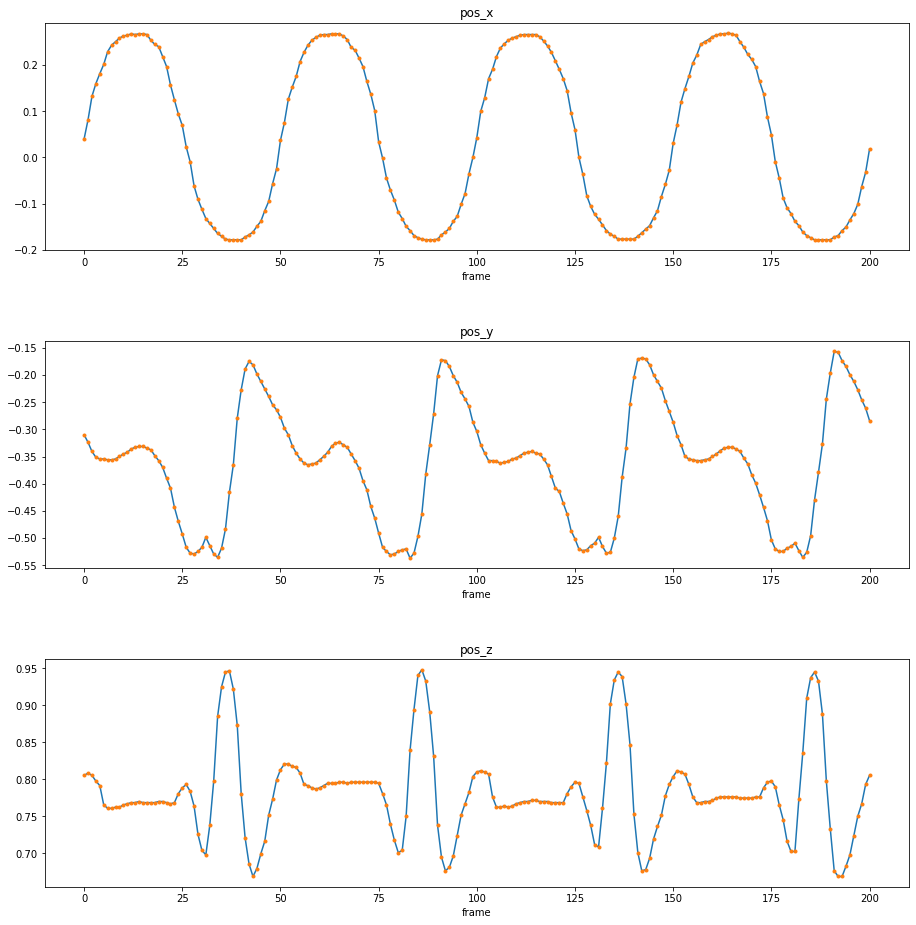

In [216]:
plt.figure(figsize=(15,15))

titles = ['pos_x', 'pos_y', 'pos_z']

for i in range(3):
    ax =plt.subplot(3,1,i+1)
    plt.plot(time, theta_ikp[:,i])
    plt.plot(time, lines[:,i], '.')
    ax.set_title(titles[i])
    plt.xlabel('frame')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)